# **7 ADVANCED SORTING**

# 7.1. SHELLSORT

The Shellsort is good for medium-sized arrays, depending on the particular implementation. It’s not quite as fast as quicksort and other **O(N×log N)** sorts, so it’s not optimum for very large data sets. Shellsort, however, is much faster than the **O(N^2)** sorts like the selection sort and the insertion sort. Shellsort’s worst-case performance is not significantly worse than its average performance. 

**The problem with the insertion sort is that:**

Here’s the problem with the insertion sort. Suppose a small item is on the far right, where the large items should be. To move this small item to its proper place on the left, all the intervening items (between the place where it is and where it should be) must be shifted one space right. This step takes close to N copies, just for one item. Not all the items must be moved a full **N** spaces, but the average item must be moved **N/2** spaces, which means the full process takes **N** times **N/2** shifts for a total of **N^2/2** copies. Thus, the performance of insertion sort is **O(N2)**.  This performance could be improved if you could somehow move a smaller item many spaces to the left without shifting all the intermediate items individually.

The insertion sort is very efficient when operating on an array that’s almost sorted. In fact, for an already-sorted array, it’s **O(N)**. If it needs to move items only one or two cells to sort the array, it can operate in almost **O(N)** time. Thus, after the array has been 4-sorted, you can 1-sort it using the ordinary insertion sort. The 
combination of the 4-sort and the 1-sort is much faster than simply applying the ordinary insertion sort without the preliminary 4-sort.

### **Interval or gap sequence (note that other interval sequences might be used)**

### **We’ve shown an initial interval—or gap—of four cells for sorting a 10-cell array. For larger arrays, the interval should start out much larger. The interval is then repeatedly reduced until it becomes 1.**

Formula for generating the sequence is: hi = 3 * hi–1 + 1  where i = 0,1,2...  and h0 = 1

For a 1,000-element array, the seventh number in the sequence, 1,093, is too large. Thus, Shellsort begin the sorting process with the sixth-largest number, creating a 364-sort. Then, each time through the outer loop of the sorting routine, it reduces the interval using the inverse of the formula previously given  hi–1 = (hi – 1) / 3.

This inverse formula generates the reverse sequence 364, 121, 40, 13, 4, 1. Starting with 364, each of these numbers is used to h-sort the array. When the array has been 1-sorted, the algorithm is done.



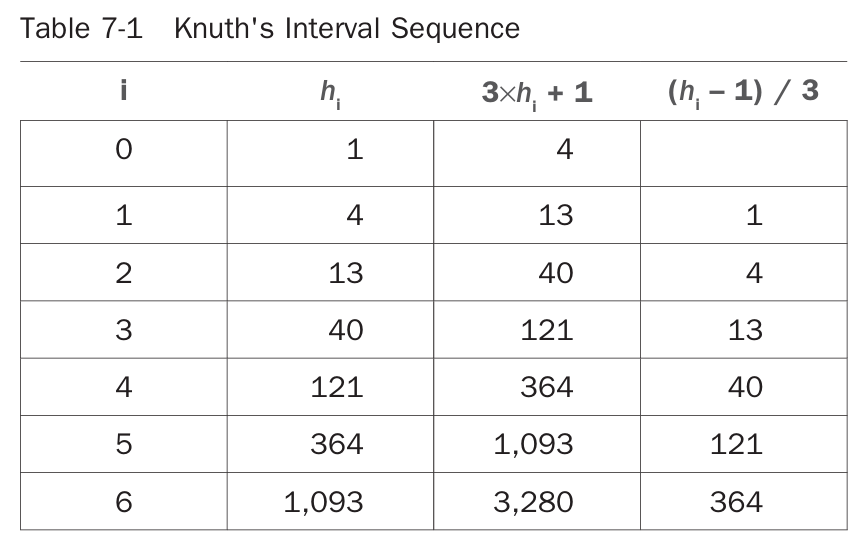

In [1]:
from IPython.display import Image, display
display(Image(filename="picture1.png", width=800))

In [2]:
# Implement ShellSort for Arrays using previous Array class

import SortArray

class Array(SortArray.Array):  # Base new Array class on SortArray
   
   def ShellSort(self):        # Sort using Shell's method:
      h = 1                    # Choose h to sort every h items
      while 3 * h + 1 < len(self): # Use Knuth's h sequence, find
         h = 3 * h + 1         # largest h less than array length
      nShifts = 0              # Count number of shifts
      while h > 0:             # Loop over decreasing h values
         for outer in range(h, len(self)): # Mark one item
            temp = self.get(outer)       # Store marked item in temp
            inner = outer                # Inner loop starts at mark
            while inner >= h and temp < self.get(inner-h): # If marked
               self.set(inner, self.get(inner-h)) # item smaller, then
               inner -= h                # shift item to right
               nShifts += 1              # Count shift 
            if inner < outer:  # If inner loop advanced a step, then
               self.set(inner, temp)     # Move marked item to 'hole'
               nShifts += 1    # and count the shift
         h = (h - 1) // 3      # Reduce h to sort smaller intervals
      return nShifts           # Return number of shifts

In [17]:
from ShellSort import *
import random
import timeit


# initialize an array (not sorted)
def initArray(size=40, maxValue = 50, seed = 24):
    """Create an Array of the specified size with a fixed sequence of random elements"""
    arr = Array(size)
    random.seed(seed)
    for i in range(size):
        arr.insert(random.randrange(maxValue))
    return arr

arr = initArray()
print(f"Array containing {len(arr)} items:\n {arr}\n")

# sort an array
shifts = arr.ShellSort()
print(f'Sorted array contains:\n {arr}\n and took {shifts} cell shifts')

Array containing 40 items:
 [45, 24, 37, 11, 13, 10, 12, 10, 42, 43, 5, 45, 48, 9, 45, 18, 46, 49, 0, 28, 29, 46, 40, 7, 1, 33, 10, 31, 47, 28, 43, 19, 31, 5, 43, 48, 16, 39, 10, 43]

Sorted array contains:
 [0, 1, 5, 5, 7, 9, 10, 10, 10, 10, 11, 12, 13, 16, 18, 19, 24, 28, 28, 29, 31, 31, 33, 37, 39, 40, 42, 43, 43, 43, 43, 45, 45, 45, 46, 46, 47, 48, 48, 49]
 and took 189 cell shifts


Sorting an array of   100 items took    594 shifts, ratio to N**(1.167) =  2.757
Sorting an array of 10,000 items took 103,086 shifts, ratio to N**(1.167) =  2.221
Sorting an array of 50,000 items took 588,149 shifts, ratio to N**(1.167) =  1.938
Sorting an array of 10,000 items took 103,086 shifts, ratio to N**(1.167) =  2.221
Sorting an array of 500,000 items took 6,204,681 shifts, ratio to N**(1.167) =  1.393
Sorting an array of 1,000,000 items took 12,700,414 shifts, ratio to N**(1.167) =  1.270


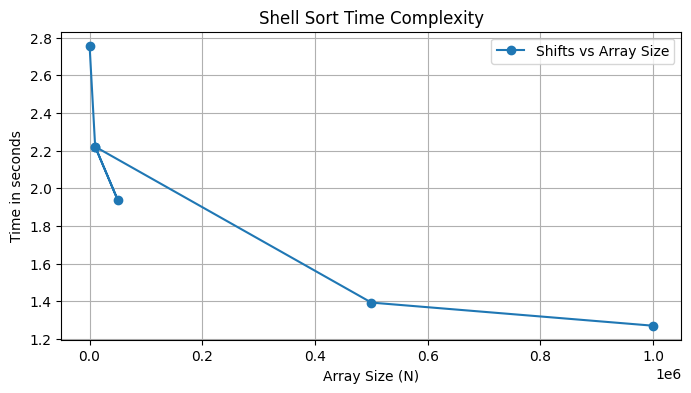

In [32]:
import matplotlib.pyplot as plt

sizes = []
shifts_list = []
ratios = []


# test on bigger array size
for size in [100, 10000, 50000, 10000, 500000, 1000000]:
    shifts = initArray(size).ShellSort()
    pwr = 7 / 6
    ratio = shifts / size ** pwr

    print(f'Sorting an array of {size:5,d} items took {shifts:6,d} shifts, '
          f'ratio to N**({pwr:5.3f}) = {ratio:6.3f}')

    # store results
    sizes.append(size)
    shifts_list.append(shifts)
    ratios.append(ratio)

# ----------- PLOT RESULTS -----------
plt.figure(figsize=(8, 4))
plt.plot(sizes, ratios, marker='o', label='Shifts vs Array Size')
plt.xlabel('Array Size (N)')
plt.ylabel('Time in seconds')
plt.title('Shell Sort Time Complexity')
plt.legend()
plt.grid(True)
plt.show()

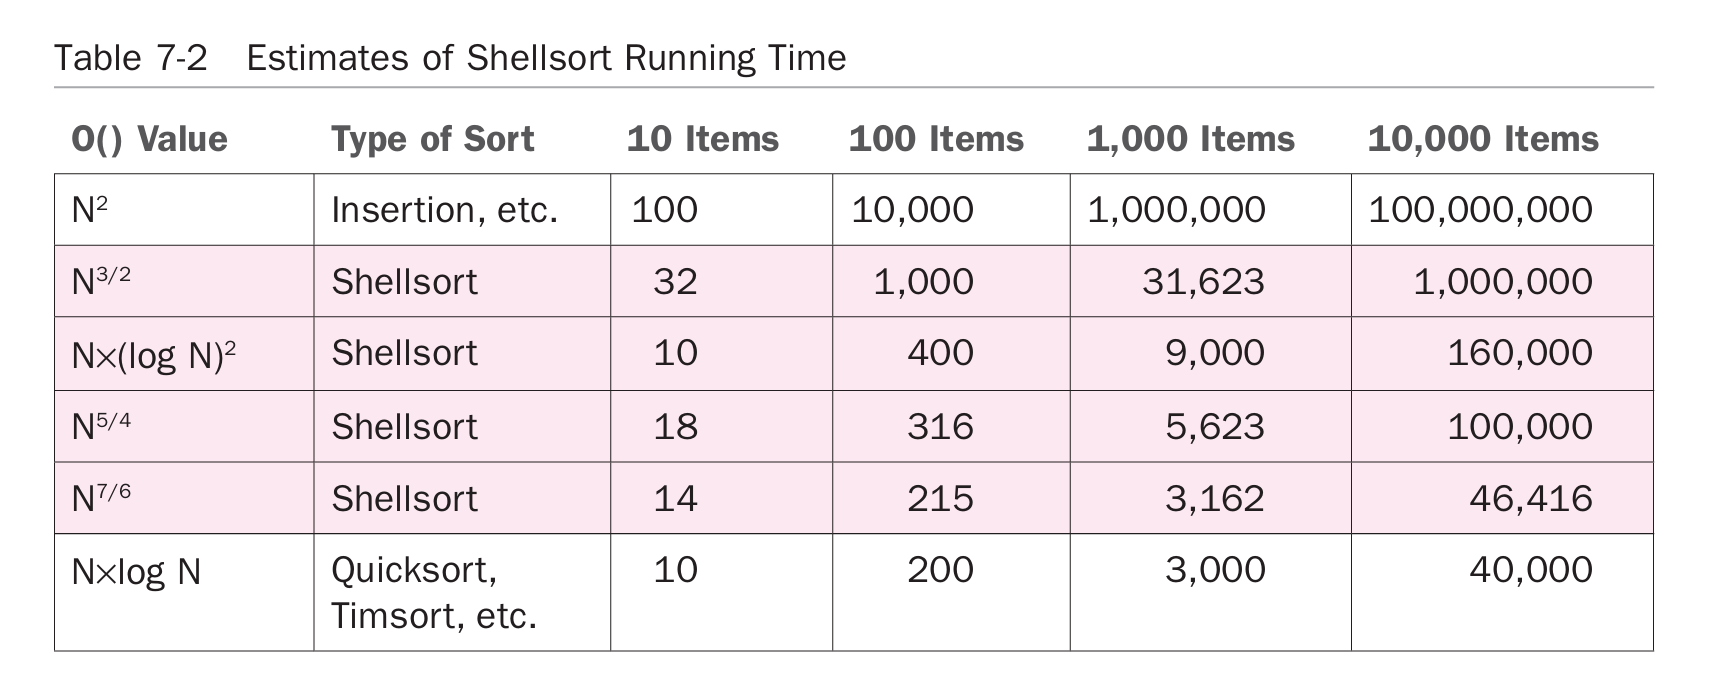

In [31]:
from IPython.display import Image, display
display(Image(filename="picture2.png", width=800))

# 7.2. PARTITIONING ALGORITHM

To partition data is to divide it into groups. You choose a value which is called **pivot value** and the algorithm put values < pivot to the left, and values > pivot to the right. 

1) Increment the left pointer until either we find a cell belonging to the upper partition, or it meets the right index.

2) Decrement the right pointer until either we find a cell belonging to the lower partition, or it meets the left index.

3) If the left index is at or above the right, the array is already partitioned, so we can return the left index as the end of the lower partition.

4) Otherwise, swap items at the left and right indices and partition the range between left and right.

Unlike some other algorithms, it allows items whose key exactly matches the pivot to be in either partition. 


In [1]:
# Implement Quicksort for Arrays using previous Array class

def identity(x): return x      # Identity function
import SortArray

class Array(SortArray.Array):  # Base new Array class on SortArray

   def partition_rec(          # Recursively partition array moving
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo=0,                 # the rest to the right/high side
         hi=None,              # within the [lo, hi] range (inclusive)
         key=identity):        # Use key function to extract keys
      if hi is None:           # Default hi value is last index
         hi = len(self) - 1    # Everything above hi is in upper part
      while (lo <= hi and      # Increment lo until it goes past hi
             key(self.get(lo)) < pivot): # or we find a key that's not
         lo += 1               # in the lower partition
      while (lo < hi and       # Decrement hi until it matches lo
             pivot < key(self.get(hi))): # or we find the pivot or
         hi -= 1               # a key not in the upper partition
      if lo >= hi:             # If lo is at or above hi, then the
         return lo             # lower partition ends at lo
      self.swap(lo, hi)        # Otherwise, swap the items at lo & hi
      return self.partition_rec( # and recursively partition remaining
         pivot, lo + 1, hi - 1, key) # items in the array

   def partition(              # Loop to partition array, moving
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo=0,                 # the rest to the right/high side
         hi=None,              # within the [lo, hi] range (inclusive)
         key=identity):        # Use key function to extract keys
      if hi is None:           # Default hi value is last index
         hi = len(self) - 1    # Everything above hi is in upper part
      while lo <= hi:          # Loop until no more items to inspect
         while (lo <= hi and   # Increment lo until it goes past hi
                key(self.get(lo)) < pivot): # or we find a key that's
            lo += 1            # not in the lower partition
         while (lo < hi and    # Decrement hi until it matches lo
                pivot < key(self.get(hi))): # or we find the pivot or
            hi -= 1            # a key not in the upper partition
         if lo >= hi:          # If lo is at or above hi, then the
            return lo          # lower partition ends at lo
         self.swap(lo, hi)     # Otherwise, swap the items at lo & hi
         lo, hi = lo + 1, hi - 1 # Continue partitioning in between
      return lo                # Range to partition is now empty

In [14]:
import random
import timeit


# a function to randonly fill array
def initArray(size=10, maxValue=45, seed=3.14159):
    """Create an Array of the specified size with a fixed sequence of
       'random' elements"""
    arr = Array(size)                   # Create the Array object
    random.seed(seed)                   # Set random number generator
    for i in range(size):               # to known state, then loop
        arr.insert(random.randrange(maxValue)) # Insert random numbers
    return arr                          # Return the filled Array


# initialize array
arr = initArray()
print(f"Array containing, {len(arr)}, items:\n {arr}\n")


# partition array using pivot value
arr.partition(23)
print("Array containing", len(arr), "items:\n", arr)

Array containing, 10, items:
 [38, 29, 42, 30, 23, 31, 8, 28, 18, 9]

Array containing 10 items:
 [9, 18, 8, 23, 30, 31, 42, 28, 29, 38]


### **EFFICIENCY**

The partition algorithm runs in **O(N)** time. It’s easy to see why this is so when running the Partition operation in the Visualization tool: the two pointers start at opposite ends of the array and move toward each other, stopping and swapping as they go. When they meet, the partition is complete. Each cell of the array is visited at most one time, either by the `lo` or the `hi` pointer. If there were twice as many items to partition, the pointers would move at the same rate, but they would have twice as many items to compare and swap, so the process would take twice as long. Thus, the running time is proportional to **N**.

More specifically, partitioning an N-cell array makes exactly **N** comparisons between keys and the pivot value. You can see that by looking at the code where the `key()` function is called and its value compared with the **pivot**. There’s one test with the item at the lo pointer and one with the `hi` pointer. Because `lo` and `hi` are checked prior to those comparisons, you know that either `lo < hi` or that the comparison with the pivot and the key at hi doesn’t happen. The lo and hi values range over all **N** cells.

The `lo` and `hi` pointers are compared with each other **N + 2** times because that comparison must succeed for each of the pivot comparisons to happen, and they must each fail 
when they find either a pair to swap or find each other. The number of comparisons is independent of how the data is arranged (except for the uncertainty between one or two 
extra comparisons at the end of the process).

The number of swaps, however, does depend on how the input data is arranged. If it’s inversely ordered, and the pivot value divides the items in half, then every pair of values 
must be swapped, which is **N/2** swaps.

# 7.3. QUICKSORT

In the majority of situations, it’s the fastest, operating in **O(N×log N)** time, and only needs **O(log N)** extra memory. Basically, the quicksort algorithm operates by partitioning an array into two subarrays and then calling itself recursively to quicksort each of these subarrays. The algorithm is arranged this way:

1) Check the base case and return if the [sub]array is small enough.

2) Choose a pivot.

3) Partition the subarray into lower and higher parts around the pivot.

4) Make a recursive call to sort the lower part.

5) Make another recursive call to sort the higher part.

### How to choose a pivot value?

1) First (or Last) Element, **Pivot = A[low] (or A[high])**, Example: Partition the array using the first element as pivot. 

Advantage: Simple and fast to implement. 

Disadvantage: Terrible for sorted or nearly sorted arrays → leads to O(n²) time.

2) Middle Element: **Pivot = A[(low + high) / 2]**

Advantage: Better than always picking the first or last element.

Disadvantage: Still not ideal for some structured input (like already partially sorted data).

3) Random Element: **Pivot = A[random index between low and high]** 

Advantage: Expected **O(n log n)** time on average.

Disadvantage: Requires random number generation, but that cost is small.

Most common practical choice for robustness.

4) Median-of-Three: **Pivot = median(A[low], A[mid], A[high])**

Advantage: Approximates the true median cheaply, reducing the chance of worst-case splits.

Often used in optimized quicksort implementations (like C’s standard library qsort).

5) True Median (Ideal but Expensive) **Pivot = median of the entire array**

Advantage: Guarantees perfect partitioning (each half has equal size) → always **O(n log n)**.

Disadvantage: Computing the true median takes **O(n)**, which removes the simplicity and efficiency of Quicksort.

A compromise solution is to examine the first, last, and middle items of the subarray, and use the median of their keys for the pivot. Picking the median of the first, last, and middle elements is called the **median-of-three** approach and is shown in the picture

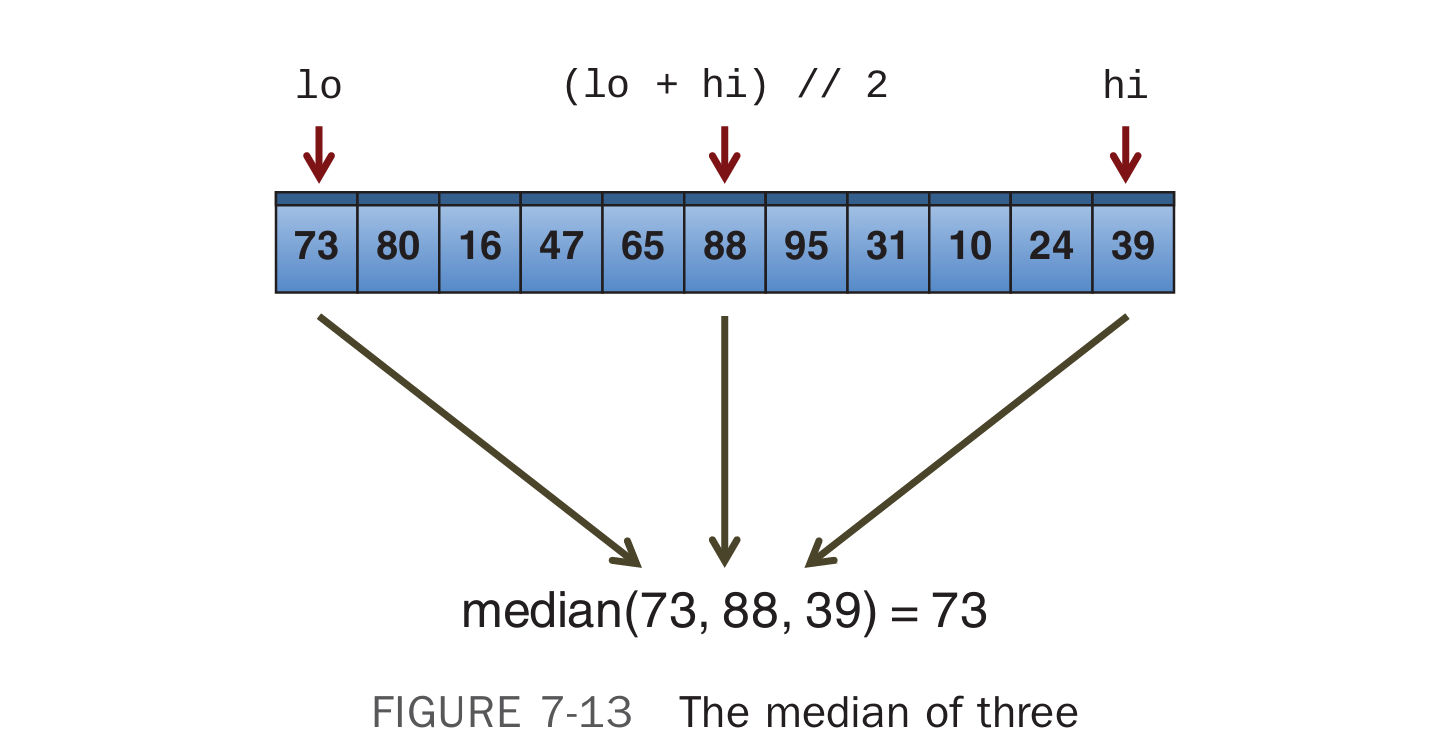

In [2]:
from IPython.display import Image, display
display(Image(filename="picture3.png", width=800))

You can use the median-of-three approach to not only select the pivot but also to sort the three elements used in the selection process

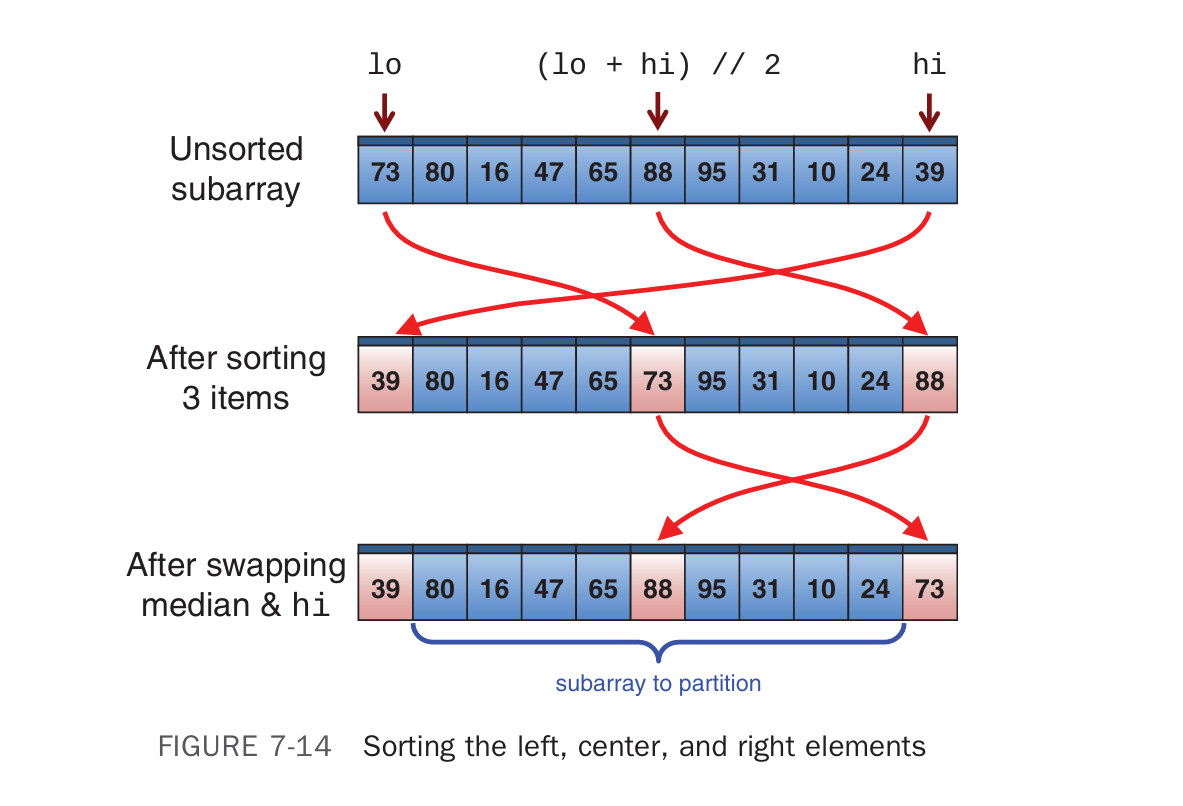

In [4]:
from IPython.display import Image, display
display(Image(filename="picture4.png", width=800))

### **Handling partitions < 3**

Often 3 is a **cutoff** (might be 5, 10, 20, as long as you choose). **Recommended a cutoff of 9** which is proved by numerical experiments After that insertion sort is applied

In [5]:
def identity(x): return x

import SortArray

class Array(SortArray.Array):
    def __partition(self, pivot, lo, hi, key=identity):
        while lo <= hi:
            while (key(self.get(lo)) < pivot):
                lo += 1
            while (lo < hi and pivot < key(self.get(hi))):
                hi -= 1
            if lo >= hi:
                return lo
            self.swap(lo, hi)
            lo, hi = lo + 1, hi - 1
        return lo
    
    def qsort(self, lo=0, hi=None, key=identity):
        if hi is None:
            hi = len(self) - 1
        if lo >= hi:
            return
        pivot_i = hi
        pivotItem = self.get(pivot_i)
        hipart = self.__partition(key(pivotItem), lo, hi - 1, key)
        print('Partitioning', lo, 'to', hi, 'leaves', self)

        if hipart < pivot_i:
            self.swap(hipart, pivot_i)
        self.qsort(lo, hipart - 1, key)
        self.qsort(hipart + 1, hi, key)

In [7]:
import random
import timeit


# a function to randonly fill array
def initArray(size=10, maxValue=45, seed=3.14159):
    """Create an Array of the specified size with a fixed sequence of
       'random' elements"""
    arr = Array(size)                   # Create the Array object
    random.seed(seed)                   # Set random number generator
    for i in range(size):               # to known state, then loop
        arr.insert(random.randrange(maxValue)) # Insert random numbers
    return arr                          # Return the filled Array

# initialize array
arr = initArray()
print(f"Array containing, {len(arr)}, items:\n {arr}\n")


# partition array using pivot value
arr.qsort()
print("Sorted array containing", len(arr), "items:\n", arr)

Array containing, 10, items:
 [38, 29, 42, 30, 23, 31, 8, 28, 18, 9]

Partitioning 0 to 9 leaves [8, 29, 42, 30, 23, 31, 38, 28, 18, 9]
Partitioning 2 to 9 leaves [8, 9, 18, 28, 23, 31, 38, 30, 42, 29]
Partitioning 2 to 4 leaves [8, 9, 18, 28, 23, 29, 38, 30, 42, 31]
Partitioning 6 to 9 leaves [8, 9, 18, 23, 28, 29, 30, 38, 42, 31]
Partitioning 8 to 9 leaves [8, 9, 18, 23, 28, 29, 30, 31, 42, 38]
Sorted array containing 10 items:
 [8, 9, 18, 23, 28, 29, 30, 31, 38, 42]


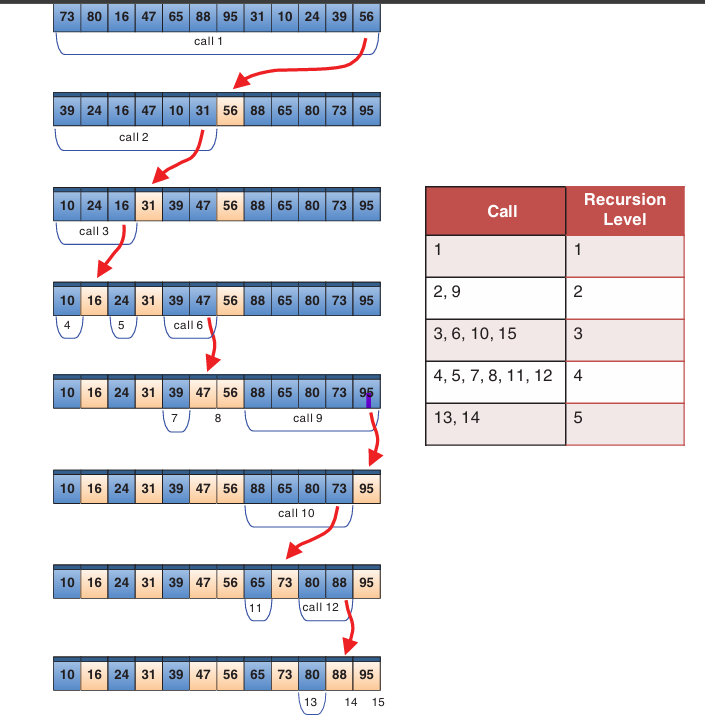

In [ ]:
from IPython.display import Image, display
display(Image(filename="picture5.png", width=800))

The order in which the partitions are created, corresponding to the call numbers, does not correspond with depth. It’s not the case that all the first-level partitions are done first, then all the second-level ones, and so on. **Instead, the left group at every level is handled before any of the right groups.**

The number of levels in the table shows that with 12 data items, the machine stack needs enough space for five sets of arguments and return values—one for each recursion level. 
This is, as you see later, somewhat greater than the logarithm to the base 2 of the number of items: **log2 (N)**. The size limit of the machine stack varies between systems. Sorting very large numbers of data items using recursive procedures may cause this stack to overflow.

# 7.4. FULL QUICKSORT

In [5]:
# Implement Quicksort for Arrays using previous Array class

def identity(x): return x      # Identity function
import SortArray

class Array(SortArray.Array):  # Base new Array class on SortArray

   def partition_rec(          # Recursively partition array moving
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo=0,                 # the rest to the right/high side
         hi=None,              # within the [lo, hi] range (inclusive)
         key=identity):        # Use key function to extract keys
      if hi is None:           # Default hi value is last index
         hi = len(self) - 1    # Everything above hi is in upper part
      while (lo <= hi and      # Increment lo until it goes past hi
             key(self.get(lo)) < pivot): # or we find a key that's not
         lo += 1               # in the lower partition
      while (lo < hi and       # Decrement hi until it matches lo
             pivot < key(self.get(hi))): # or we find the pivot or
         hi -= 1               # a key not in the upper partition
      if lo >= hi:             # If lo is at or above hi, then the
         return lo             # lower partition ends at lo
      self.swap(lo, hi)        # Otherwise, swap the items at lo & hi
      return self.partition_rec( # and recursively partition remaining
         pivot, lo + 1, hi - 1, key) # items in the array

   def partition(              # Loop to partition array, moving
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo=0,                 # the rest to the right/high side
         hi=None,              # within the [lo, hi] range (inclusive)
         key=identity):        # Use key function to extract keys
      if hi is None:           # Default hi value is last index
         hi = len(self) - 1    # Everything above hi is in upper part
      while lo <= hi:          # Loop until no more items to inspect
         while (lo <= hi and   # Increment lo until it goes past hi
                key(self.get(lo)) < pivot): # or we find a key that's
            lo += 1            # not in the lower partition
         while (lo < hi and    # Decrement hi until it matches lo
                pivot < key(self.get(hi))): # or we find the pivot or
            hi -= 1            # a key not in the upper partition
         if lo >= hi:          # If lo is at or above hi, then the
            return lo          # lower partition ends at lo
         self.swap(lo, hi)     # Otherwise, swap the items at lo & hi
         lo, hi = lo + 1, hi - 1 # Continue partitioning in between
      return lo                # Range to partition is now empty

   def choosePivot(self, lo, hi): # Choose the pivot index around 
      return hi                # which to partition as the rightmost

   def quicksort_sketch(       # Sort items in an array between lo
         self, lo=0, hi=None,  # and hi indices using Hoare's
         key=identity):        # quicksort algorithm on the keys
      if hi is None:           # Fill in hi value if not specified
         hi = len(self) - 1
      if lo >= hi:             # If range has 1 or fewer cells,
         return                # then no sorting is needed
      
      pivot = self.choosePivot(lo, hi) # Choose a pivot

      hipart = self.partition( # Partition array around the key
         key(self.get(pivot)), # of the item at the pivot index and
         lo, hi, key)          # record where high part starts

      self.quicksort_sketch(lo, hipart - 1, key) # Sort lower part
      self.quicksort_sketch(hipart, hi, key) # Sort higher part

   def __partition(            # Private function partitions array by
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo,                   # the rest to the right/high side
         hi,                   # within the [lo, hi] range (inclusive)
         key=identity):        # knowing at least one key == pivot
      while lo <= hi:          # Loop until no more items to inspect
         while (key(self.get(lo)) # Increment lo until we find a key 
                < pivot):      # that's not in the lower partition
            lo += 1            # Knowing pivot == one key in [lo,hi+1]
         while (lo < hi and    # Decrement hi until it matches lo
                pivot < key(self.get(hi))): # or we find the pivot or
            hi -= 1            # a key not in the upper partition
         if lo >= hi:          # If lo is at or above hi, then the
            return lo          # lower partition ends at lo
         self.swap(lo, hi)     # Otherwise, swap the items at lo & hi
         lo, hi = lo + 1, hi - 1 # Continue partitioning in between
      return lo                # Range to partition is now empty

   def qsort(                  # Sort items in an array between lo
         self, lo=0, hi=None,  # and hi indices using Hoare's
         key=identity):        # quicksort algorithm on the keys
      if hi is None:           # Fill in hi value if not specified
         hi = len(self) - 1
      if lo >= hi:             # If range has 1 or fewer cells,
         return                # then no sorting is needed
      pivot_i = hi             # Choose pivot index to be rightmost
      pivotItem = self.get(pivot_i) # Get item at pivot index
      hipart = self.__partition( # Partition array around the key
         key(pivotItem),       # of the item at the pivot index and
         lo, hi - 1, key)      # record where high part starts
      if hipart < pivot_i:     # If pivot index is above high
         self.swap(            # part start, then swap pivot item
            hipart, pivot_i)   # with high part start
      self.qsort(lo, hipart - 1, key) # Sort lower part
      self.qsort(hipart + 1, hi, key) # Sort higher part

   def qsort_show(             # Sort items in an array between lo
         self, lo=0, hi=None,  # and hi indices using Hoare's
         key=identity):        # quicksort algorithm on the keys
      if hi is None:           # Fill in hi value if not specified
         hi = len(self) - 1
      if lo >= hi:             # If range has 1 or fewer cells,
         return                # then no sorting is needed
      pivot_i = hi             # Choose pivot index to be rightmost
      pivotItem = self.get(pivot_i) # Get item at pivot index
      hipart = self.__partition( # Partition array around the key
         key(pivotItem),       # of the item at the pivot index and
         lo, hi - 1, key)      # record where high part starts
      if hipart < pivot_i:     # If pivot index is above high
         self.swap(            # part start, then swap pivot item
            hipart, pivot_i)   # with high part start
      print('Partitioning', lo, 'to', hi, 'leaves', self)
      self.qsort_show(lo, hipart - 1, key) # Sort lower part
      self.qsort_show(hipart + 1, hi, key) # Sort higher part

   def medianOfThree(          # Find median of lo, middle, and hi
         self, lo, hi,         # keys in subarray and put median
         key=identity):        # in hi position for partition
      mid = (lo + hi) // 2     # Compute middle index
      if key(self.get(lo)) > key(self.get(mid)): # Compare 1st pair
         self.swap(lo, mid)    # of keys and swap if lo > mid
      if key(self.get(lo)) > key(self.get(hi)): # Compare 2nd pair
         self.swap(lo, hi)     # of keys and swap if hi is lowest
      # At this point lo has the minimum of the 3 keys
      if key(self.get(hi)) > key(self.get(mid)): # Compare 3rd pair
         self.swap(hi, mid)    # of keys again and swap if hi > mid
      return self.get(hi)      # Return item with median key (@ hi)
         
   def insertionSort(          # Sort subarray by repeated inserts
         self,                 # This insertion sort will be used
         lo=0,                 # on small subarrays by quicksort
         hi=None,
         key=identity):
      if hi is None:           # Fill in hi value if not specified
         hi = len(self) - 1    # as last item in array
      for outer in range(lo + 1, hi + 1): # Mark one item
         temp = self.get(outer) # Store marked item in temp
         temp_key = key(temp)
         inner = outer         # Inner loop starts at mark at right
         while (inner > lo and # If inner hasn't reached lo and next
                temp_key < key(self.get(inner-1))): # item's key is
            self.set(inner, self.get(inner-1)) # smaller, then shift
            inner -= 1         # next item to right & move inner left
         self.set(inner, temp) # Move marked item to 'hole'

   def __part(                 # Private function partitions array by
         self,                 # items whose keys are below or equal
         pivot,                # a pivot value to the left/low side
         lo,                   # the rest to the right/high side
         hi,                   # within [lo, hi] knowing there is 1
         key=identity):        # key below pivot & pivot at hi+1
      while lo <= hi:          # Loop until no more items to inspect
         while (key(self.get(lo)) # Increment lo until we find a key 
                < pivot):      # that's not in the lower partition
            lo += 1            # Knowing pivot == one key in [lo,hi+1]
         while (pivot <        # Decrement hi until it points to key
                key(self.get(hi))): # in lower partition
            hi -= 1            # a key not in the upper partition
         if lo >= hi:          # If lo is at or above hi, then the
            return lo          # lower partition ends at lo
         self.swap(lo, hi)     # Otherwise, swap the items at lo & hi
         lo, hi = lo + 1, hi - 1 # Continue partitioning in between
      return lo                # Range to partition is now empty
      
   def quicksort(              # Sort items in an array between lo
         self,                 # and hi indices using Hoare's
         lo=0,                 # quicksort algorithm.  For short
         hi=None,              # subarrays, use insertion sort.
         short=3,              # Short must be 3 or more to enable
         key=identity):        # median of three choice of pivot
      if hi is None:           # Fill in hi value if not specified
         hi = len(self) - 1    # as last item in array
      short = max(3, short)    # Enforce short limit >= 3
      if hi - lo + 1 <= short: # If subarray is short, then use
         return self.insertionSort(lo, hi, key) # insertion sort
      pivotItem = self.medianOfThree( # Else find median key of lo,
         lo, hi, key)          # mid, hi and place item at hi index
      hipart = self.__part(    # Partition array around the key of
         key(pivotItem),       # the pivot item and
         lo + 1, hi - 1, key)  # record where high part starts
      self.swap(hipart, hi)    # Swap pivot with high part start
      self.quicksort(lo, hipart - 1, short, key) # Sort lower part
      self.quicksort(hipart + 1, hi, short, key) # Sort higher part


In [2]:
from Quicksort import *
import random
import timeit
import math


def initArray(size=500, maxValue=25, seed=5):
    arr = Array(size)
    random.seed(seed)
    for i in  range(size):
        arr.insert(random.randrange(maxValue))
    return arr


# initialize array
arr = initArray(5)
print(f"1. Array is containing {len(arr)} items:\n {arr}\n")

1. Array is containing 5 items:
 [19, 8, 23, 11, 22]



In [3]:
# show partitioning step-by-step
for size in [5,10]:
    arr1 = initArray(size)
    for pivot in [0] if size < 2 else [-1, arr1.get(size // 2-1), arr1.get(size//2), 101]:
        print(f"Initialized array contains:\n {arr1}\n")
        part_index = arr1.partition(pivot)
        print(f"Partitioning an array of size: {size} around {pivot} returns {part_index}")
        print(" " * (28 + 4 * part_index) + "V")
        print("Partitioned array contains", arr1)

Initialized array contains:
 [19, 8, 23, 11, 22]

Partitioning an array of size: 5 around -1 returns 0
                            V
Partitioned array contains [19, 8, 23, 11, 22]
Initialized array contains:
 [19, 8, 23, 11, 22]

Partitioning an array of size: 5 around 8 returns 1
                                V
Partitioned array contains [8, 19, 23, 11, 22]
Initialized array contains:
 [8, 19, 23, 11, 22]

Partitioning an array of size: 5 around 23 returns 4
                                            V
Partitioned array contains [8, 19, 22, 11, 23]
Initialized array contains:
 [8, 19, 22, 11, 23]

Partitioning an array of size: 5 around 101 returns 5
                                                V
Partitioned array contains [8, 19, 22, 11, 23]
Initialized array contains:
 [19, 8, 23, 11, 22, 23, 20, 16, 0, 14]

Partitioning an array of size: 10 around -1 returns 0
                            V
Partitioned array contains [19, 8, 23, 11, 22, 23, 20, 16, 0, 14]
Initialized array con

In [4]:
# quicksort example
arr = initArray(10)
print('Quicksorting', arr, ':')
arr.qsort_show()

Quicksorting [19, 8, 23, 11, 22, 23, 20, 16, 0, 14] :
Partitioning 0 to 9 leaves [0, 8, 11, 14, 22, 23, 20, 16, 19, 23]
Partitioning 0 to 2 leaves [0, 8, 11, 14, 22, 23, 20, 16, 19, 23]
Partitioning 0 to 1 leaves [0, 8, 11, 14, 22, 23, 20, 16, 19, 23]
Partitioning 4 to 9 leaves [0, 8, 11, 14, 22, 19, 20, 16, 23, 23]
Partitioning 4 to 7 leaves [0, 8, 11, 14, 16, 19, 20, 22, 23, 23]
Partitioning 5 to 7 leaves [0, 8, 11, 14, 16, 19, 20, 22, 23, 23]
Partitioning 5 to 6 leaves [0, 8, 11, 14, 16, 19, 20, 22, 23, 23]


In [5]:
arr = Array(12)
for i in [73, 80, 16, 47, 65, 88, 95, 31, 10, 24, 39, 56]:
   arr.insert(i)
print('Quicksorting', arr, ':')
arr.qsort_show()

Quicksorting [73, 80, 16, 47, 65, 88, 95, 31, 10, 24, 39, 56] :
Partitioning 0 to 11 leaves [39, 24, 16, 47, 10, 31, 56, 88, 65, 80, 73, 95]
Partitioning 0 to 5 leaves [10, 24, 16, 31, 39, 47, 56, 88, 65, 80, 73, 95]
Partitioning 0 to 2 leaves [10, 16, 24, 31, 39, 47, 56, 88, 65, 80, 73, 95]
Partitioning 4 to 5 leaves [10, 16, 24, 31, 39, 47, 56, 88, 65, 80, 73, 95]
Partitioning 7 to 11 leaves [10, 16, 24, 31, 39, 47, 56, 88, 65, 80, 73, 95]
Partitioning 7 to 10 leaves [10, 16, 24, 31, 39, 47, 56, 65, 73, 80, 88, 95]
Partitioning 9 to 10 leaves [10, 16, 24, 31, 39, 47, 56, 65, 73, 80, 88, 95]


In [ ]:
# initialize array and do quick sorting on it with time
arr = initArray(10)
print("Array containing", len(arr), "items:\n", arr)

test = 'initArray().quicksort()'
elapsed = timeit.timeit(test, number=100, globals=globals())
print(test, "took", elapsed, "seconds", flush=True)

arr.quicksort()
print('Sorted array contains:\n', arr)

Array containing 10 items:
 [19, 8, 23, 11, 22, 23, 20, 16, 0, 14]
initArray().quicksort() took 0.12194280000403523 seconds
Sorted array contains:
 [0, 8, 11, 14, 16, 19, 20, 22, 23, 23]


Camparsion of quicksorting and inertion sorting speed
Items Quicksort  N*logN  Ratio                   | Insertion  N**2    Ratio
   50 0.002 secs 2.8e+02 1.567e+05               | 0.005 secs 2.5e+03 5.333e+05
  100 0.003 secs 6.6e+02 2.444e+05               | 0.008 secs 1.0e+04 1.310e+06
  200 0.004 secs 1.5e+03 3.587e+05               | 0.027 secs 4.0e+04 1.477e+06
  500 0.011 secs 4.5e+03 3.970e+05               | 0.166 secs 2.5e+05 1.505e+06
1,000 0.025 secs 1.0e+04 4.041e+05               | 0.766 secs 1.0e+06 1.305e+06


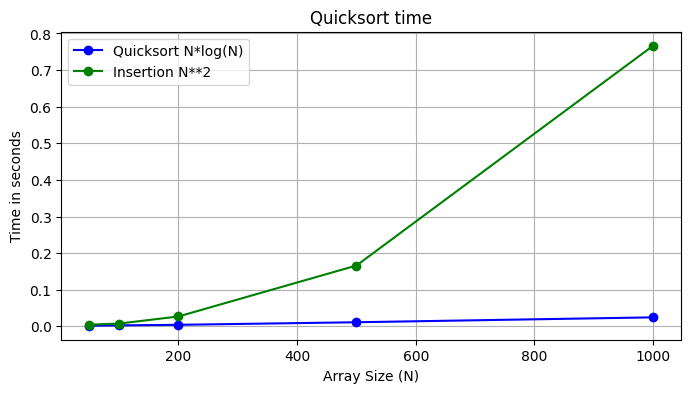

In [16]:
import matplotlib.pyplot as plt

items = []
sortTime = []
insertTime = []

print('Camparsion of quicksorting and inertion sorting speed')
print('Items Quicksort  N*logN  Ratio                   | Insertion  N**2    Ratio')
for size in [50, 100, 200, 500, 1000]:
   q_test = 'initArray(size).quicksort()'
   q_elapsed = timeit.timeit(q_test, number=10, globals=globals())
   nlogn = size * math.log(size, 2)
   n2 = size * size
   i_test = 'initArray(size).insertionSort()'
   i_elapsed = timeit.timeit(i_test, number=10, globals=globals())
   print('{:5,d} {:5.3f} secs {:6.1e} {:6.3e}               | {:5.3f} secs {:6.1e} {:6.3e}'
         .format(size, q_elapsed, nlogn, nlogn / q_elapsed,
                 i_elapsed, n2, n2 / i_elapsed))
   
   # store results
   items.append(size)
   sortTime.append(q_elapsed)
   insertTime.append(i_elapsed)


# ----------- PLOT RESULTS -----------
plt.figure(figsize=(8, 4))
plt.plot(items, sortTime, marker='o', label='Quicksort N*log(N)', color='blue')
plt.plot(items, insertTime, marker='o', label='Insertion N**2', color='green')
plt.xlabel('Array Size (N)')
plt.ylabel('Time in seconds')
plt.title('Quicksort time')
plt.legend()
plt.grid(True)
plt.show()
